In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [57]:
sf = pd.read_csv("resources/superfunddata.csv" , dtype={'Zip': str}) #, "Latitude":float
# sf["Latitude"].str.replace("\u202d+","")
# .astype(np.float64)
# sf["Latitude"] = sf["Latitude"].str.decode("unicode_escape")
# sf["Longitude"] = sf["Longitude"].str.decode("unicode_escape")
# sf["Latitude"] = float(sf["Latitude"])
sf.head()

,Reg,St,Site Name,Unnamed: 3,Site ID,EPA ID,Address,City,Zip,County,Unnamed: 10,Unnamed: 11,FF?,Latitude,Longitude,Final Date,Unnamed: 16,Unnamed: 17
0,‭01‬,CT,BARKHAMSTED-NEW HARTFORD LANDFILL,NaN,‭0100255‬,CTD980732333,ROUTE 44,BARKHAMSTED,06063,LITCHFIELD,NaN,NaN,N,‭+41.980550‬,‭-073.047220‬,10/04/89,NaN,NaN
1,‭01‬,CT,BEACON HEIGHTS LANDFILL,NaN,‭0100180‬,CTD072122062,BLACKBERRY HILL ROAD,BEACON FALLS,06403,NEW HAVEN,NaN,NaN,N,‭+41.431950‬,‭-073.035280‬,09/08/83,NaN,NaN
2,‭01‬,CT,DURHAM MEADOWS,NaN,‭0100108‬,CTD001452093,124 MAIN ST,DURHAM,06422,MIDDLESEX,NaN,NaN,N,‭+41.481110‬,‭-072.681380‬,10/04/89,NaN,NaN
3,‭01‬,CT,GALLUP'S QUARRY,NaN,‭0100201‬,CTD108960972,ROUTE 12,PLAINFIELD,06374,WINDHAM,NaN,NaN,N,‭+41.665280‬,‭-071.924160‬,10/04/89,NaN,NaN
4,‭01‬,CT,KELLOGG-DEERING WELL FIELD,NaN,‭0100252‬,CTD980670814,NORWALK WATER DEPARTMENT,NORWALK,06856,FAIRFIELD,NaN,NaN,N,‭+41.130550‬,‭-073.431950‬,09/21/84,NaN,NaN


In [58]:
sf["Latitude"] = sf["Latitude"].str.encode("ascii", "ignore")
sf["Longitude"] = sf["Longitude"].str.encode("ascii", "ignore")
# sf["Latitude"] = float(sf["Latitude"])
sf.head()

,Reg,St,Site Name,Unnamed: 3,Site ID,EPA ID,Address,City,Zip,County,Unnamed: 10,Unnamed: 11,FF?,Latitude,Longitude,Final Date,Unnamed: 16,Unnamed: 17
0,‭01‬,CT,BARKHAMSTED-NEW HARTFORD LANDFILL,NaN,‭0100255‬,CTD980732333,ROUTE 44,BARKHAMSTED,06063,LITCHFIELD,NaN,NaN,N,b'+41.980550',b'-073.047220 ',10/04/89,NaN,NaN
1,‭01‬,CT,BEACON HEIGHTS LANDFILL,NaN,‭0100180‬,CTD072122062,BLACKBERRY HILL ROAD,BEACON FALLS,06403,NEW HAVEN,NaN,NaN,N,b'+41.431950',b'-073.035280 ',09/08/83,NaN,NaN
2,‭01‬,CT,DURHAM MEADOWS,NaN,‭0100108‬,CTD001452093,124 MAIN ST,DURHAM,06422,MIDDLESEX,NaN,NaN,N,b'+41.481110',b'-072.681380 ',10/04/89,NaN,NaN
3,‭01‬,CT,GALLUP'S QUARRY,NaN,‭0100201‬,CTD108960972,ROUTE 12,PLAINFIELD,06374,WINDHAM,NaN,NaN,N,b'+41.665280',b'-071.924160 ',10/04/89,NaN,NaN
4,‭01‬,CT,KELLOGG-DEERING WELL FIELD,NaN,‭0100252‬,CTD980670814,NORWALK WATER DEPARTMENT,NORWALK,06856,FAIRFIELD,NaN,NaN,N,b'+41.130550',b'-073.431950 ',09/21/84,NaN,NaN


In [59]:
njsf = sf[sf["St"]=="NJ"]

In [60]:
sf["Latitude"].sort_values(ascending=True).head()

1104              b''
756               b''
1255    b'+13.439160'
1254    b'+13.572910'
307     b'+17.963200'
Name: Latitude, dtype: object

In [61]:
sf.loc[1104]

Reg                                                                                                                     ‭08‬
St                                                                                                                        CO
Site Name                                                                                 NELSON TUNNEL/COMMODORE WASTE ROCK
Unnamed: 3                                                                                                               NaN
Site ID                                                                                                            ‭0802630‬
EPA ID                                                                                                          CON000802630
Address                                                                      NATIONAL FOREST ROAD 503.4 1 MILE NORTH OF TOWN
City                                                                                                                  Creede


In [62]:
sf.loc[756]

Reg                                                                                                                       ‭05‬
St                                                                                                                          IN
Site Name                                                                            WEST VERMONT DRINKING WATER CONTAMINATION
Unnamed: 3                                                                                                                 NaN
Site ID                                                                                                              ‭0510429‬
EPA ID                                                                                                            INN000510429
Address                                                                      INTERSECTION OF WEST VERMONT ST AND COSSELL ROAD 
City                                                                                                           

In [63]:
sf=sf.drop(sf.index[1104])
sf=sf.drop(sf.index[756])

In [64]:
sf["Longitude"].sort_values()

319     b'-064.885000 '
302     b'-065.310600 '
310     b'-065.905417 '
309     b'-065.908700 '
308     b'-066.100972 '
307     b'-066.146100 '
304     b'-066.161940 '
315     b'-066.231940 '
305     b'-066.286204 '
317     b'-066.330280 '
318     b'-066.389720 '
313     b'-066.458000 '
316     b'-066.590100 '
312     b'-066.600000 '
311     b'-066.694724 '
314     b'-067.033904 '
303     b'-067.148058 '
48      b'-067.358330 '
52      b'-067.883880 '
47      b'-068.810130 '
57      b'-069.182220 '
56      b'-069.189020 '
49      b'-069.261110 '
58      b'-069.988330 '
51      b'-070.081391 '
53      b'-070.294200 '
55      b'-070.481500 '
34      b'-070.521380 '
54      b'-070.741660 '
62      b'-070.817210 '
             ...       
1083     b'-96.453330 '
967      b'-96.562220 '
960      b'-96.779720 '
1002     b'-96.872500 '
977      b'-97.179300 '
963      b'-97.401490 '
1081     b'-97.416667 '
1089     b'-97.421380 '
1001     b'-97.438050 '
966      b'-97.450000 '
969      b'-97.5

In [65]:
sf=sf.drop(sf.index[1335]) #these were NaN
sf=sf.drop(sf.index[1334])

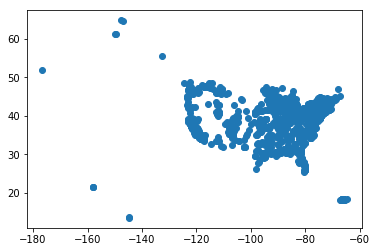

In [66]:
plt.scatter(sf["Longitude"], sf["Latitude"])
plt.show()

In [67]:
sf[]

SyntaxError: invalid syntax (<ipython-input-67-3800d2a50075>, line 1)

In [ ]:
queryUrl = "http://data.fcc.gov/api/block/find?format=json&showall=true"

for index, row in sf[sf["St"]=="AK"].iterrows():
    print("-----------------------------------------------------------")

    lat = "&latitude=" + str(row["Latitude"].decode("utf-8"))
    lng = "&longitude=" + str(row["Longitude"].decode("utf-8"))

    print(queryUrl+lat+lng)

    try:
        response = requests.get(queryUrl+lat+lng).json()
        print(response)
    except:
        print(row["Latitude"]+" "+row["Longitude"]+ " issue")
    

In [ ]:
file = "resources/deletedsites.csv"
deleted_df = pd.read_csv(file)
deleted_df.head()